# Getting started

## Read an image

Second argument is a flag which specifies the way image should be read.

* cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

In [0]:
# Read an image
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('01.png',0)

## Display an image

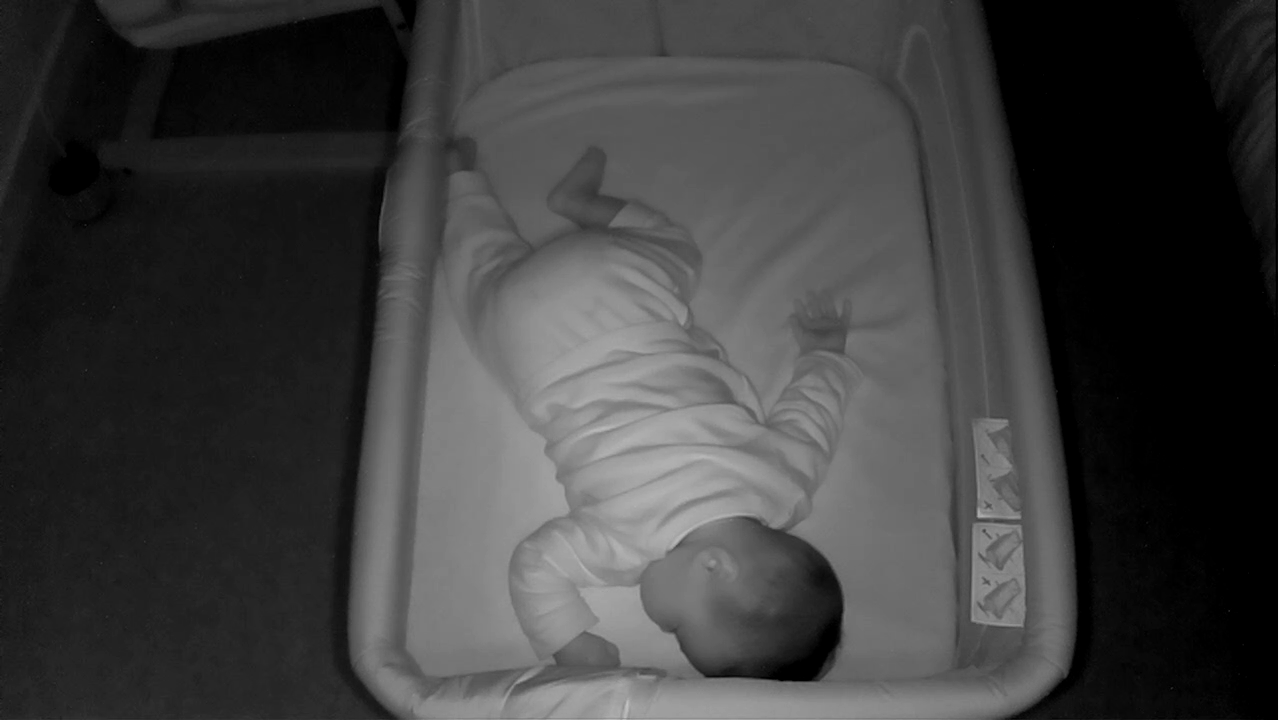

-1

In [8]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)
cv2.waitKey(0)

## Write an image

In [9]:
cv2.imwrite('img_diff.png',img)

True

## Display an image with Matplotlib

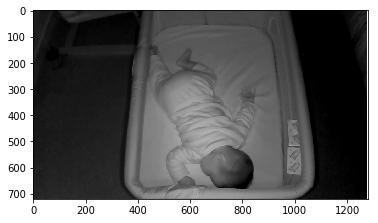

In [10]:
from matplotlib import pyplot as plt

plt.imshow(img, cmap='gray')
plt.show()

# Core operations

In [0]:
import cv2
import numpy as np

img = cv2.imread('01.png')

In [12]:
img.shape

(720, 1280, 3)

In [0]:
# Split an image into channels

b, g, r = cv2.split(img)

In [0]:
# Alternatively
b = img[:,:,0]

In [0]:
# Set the red channel to zero:
img[:,:,2] = 0

## Arithmetic Operations on Images

In [38]:
# There is a difference between OpenCV addition and Numpy addition. 
# OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

# It will be more visible when you add two images. OpenCV function will provide a better result. So always better stick to OpenCV functions.

x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y))    # 250+10 = 260 => 255
print(x+y)    # 250+10 = 260 % 256 = 4

[[255]]
[4]


## Image Colorspaces

### Adaptive thresholding

In [0]:
block_size = 121
c = 2

min_thresh = 150

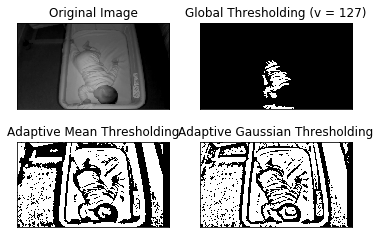

In [104]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('01.png', 0)
img = cv2.medianBlur(img, 5)

ret,th1 = cv2.threshold(img,min_thresh,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

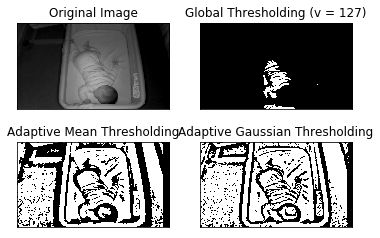

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('02.png', 0)
img = cv2.medianBlur(img, 5)

ret,th2_1 = cv2.threshold(img,min_thresh,255,cv2.THRESH_BINARY)
th2_2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c)
th2_3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th2_1, th2_2, th2_3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

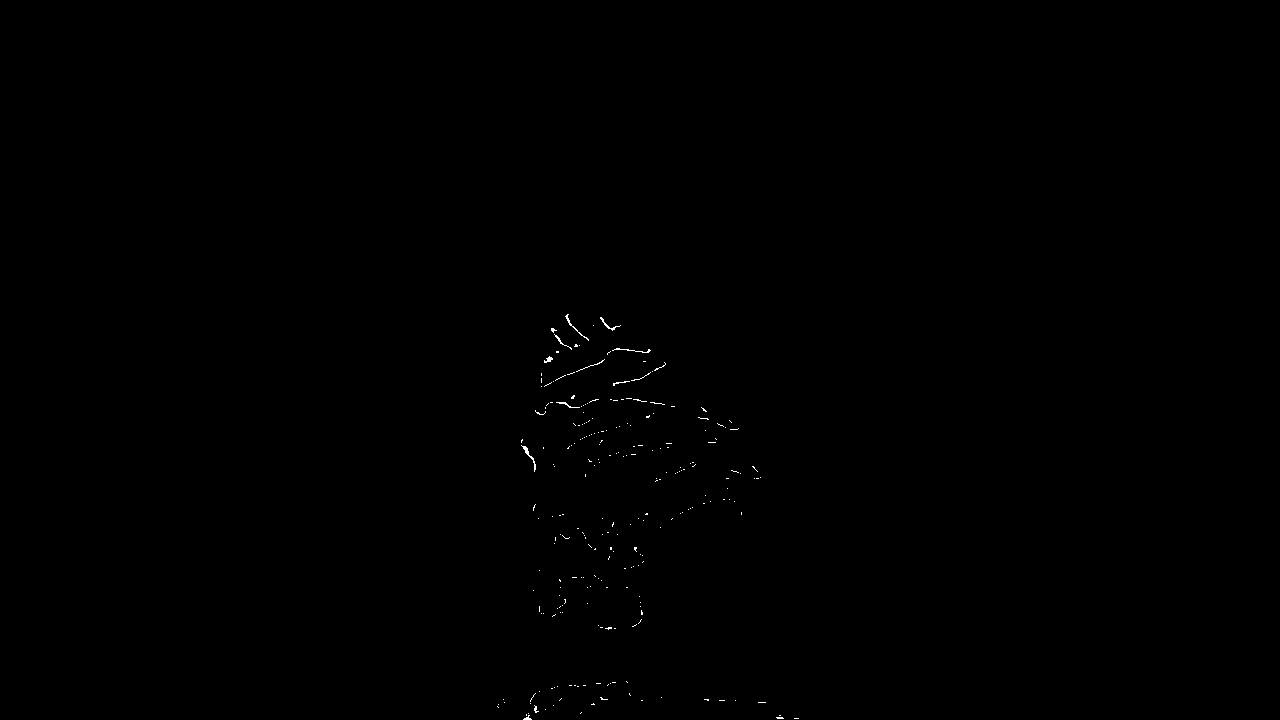

-1

In [106]:
from google.colab.patches import cv2_imshow

img_diff = cv2.subtract(th1,th2_1)

cv2_imshow(img_diff)
cv2.waitKey(0)

SSIM: 0.9661477116541406


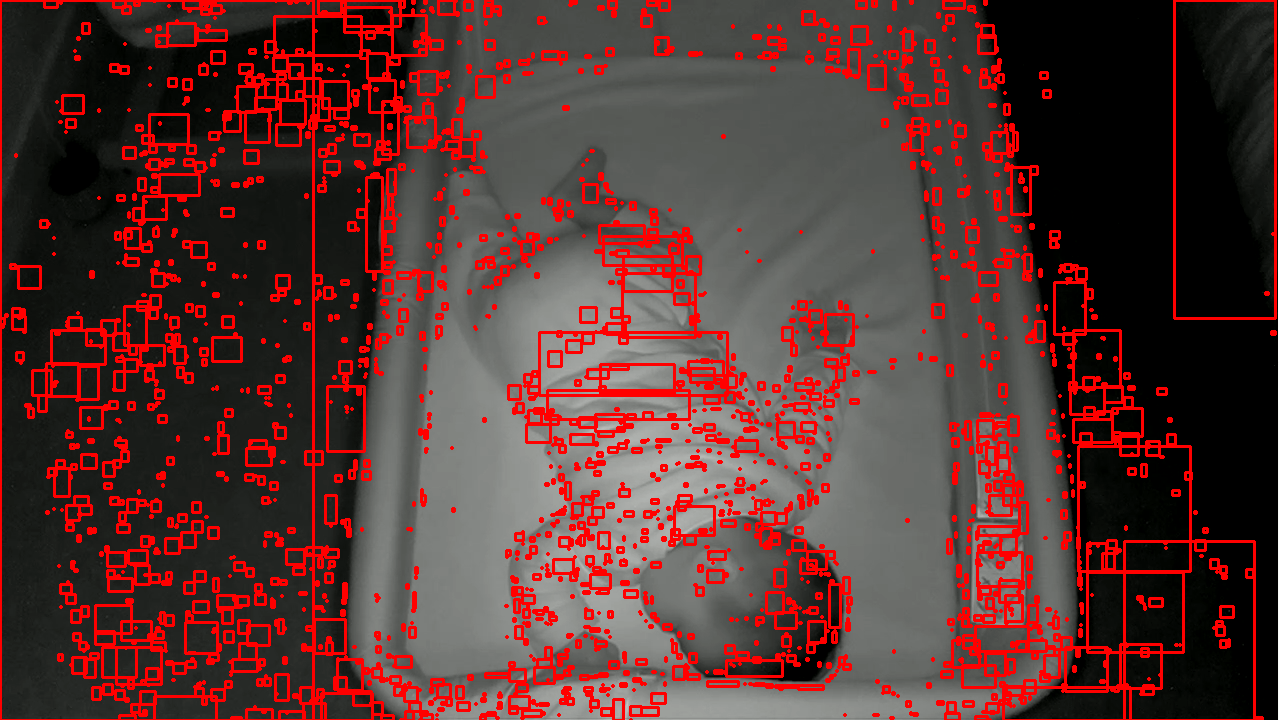

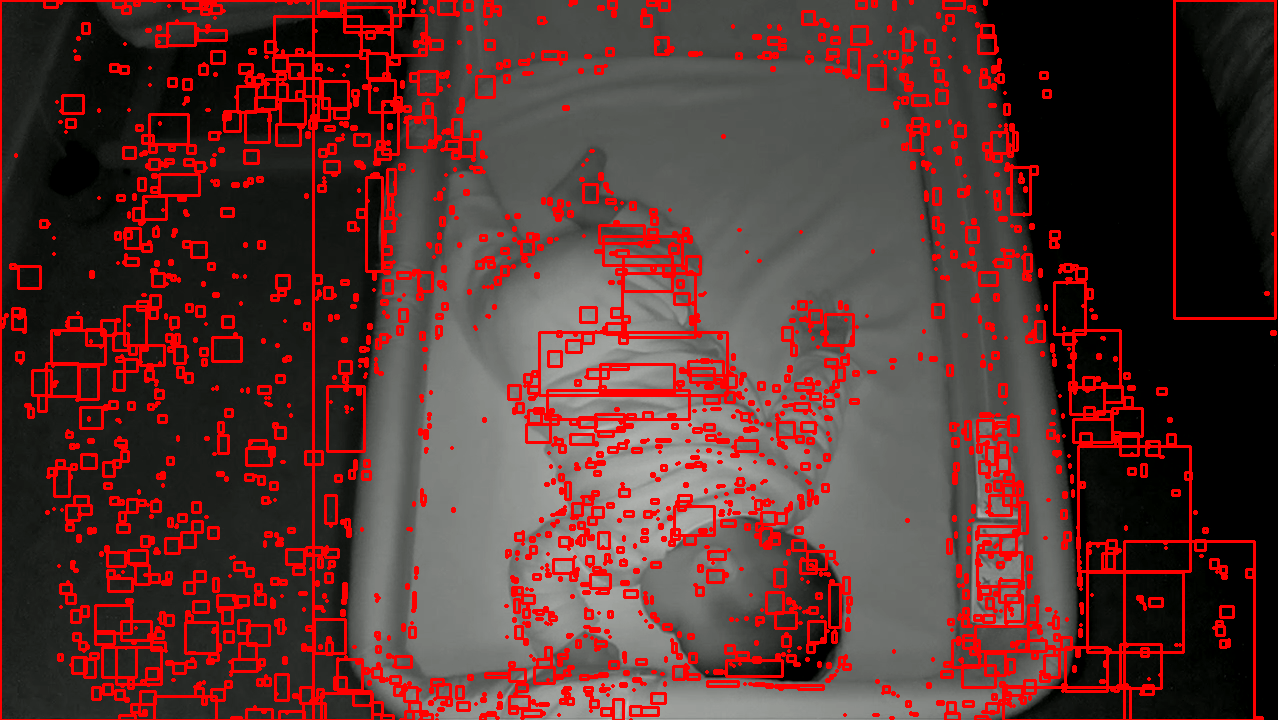

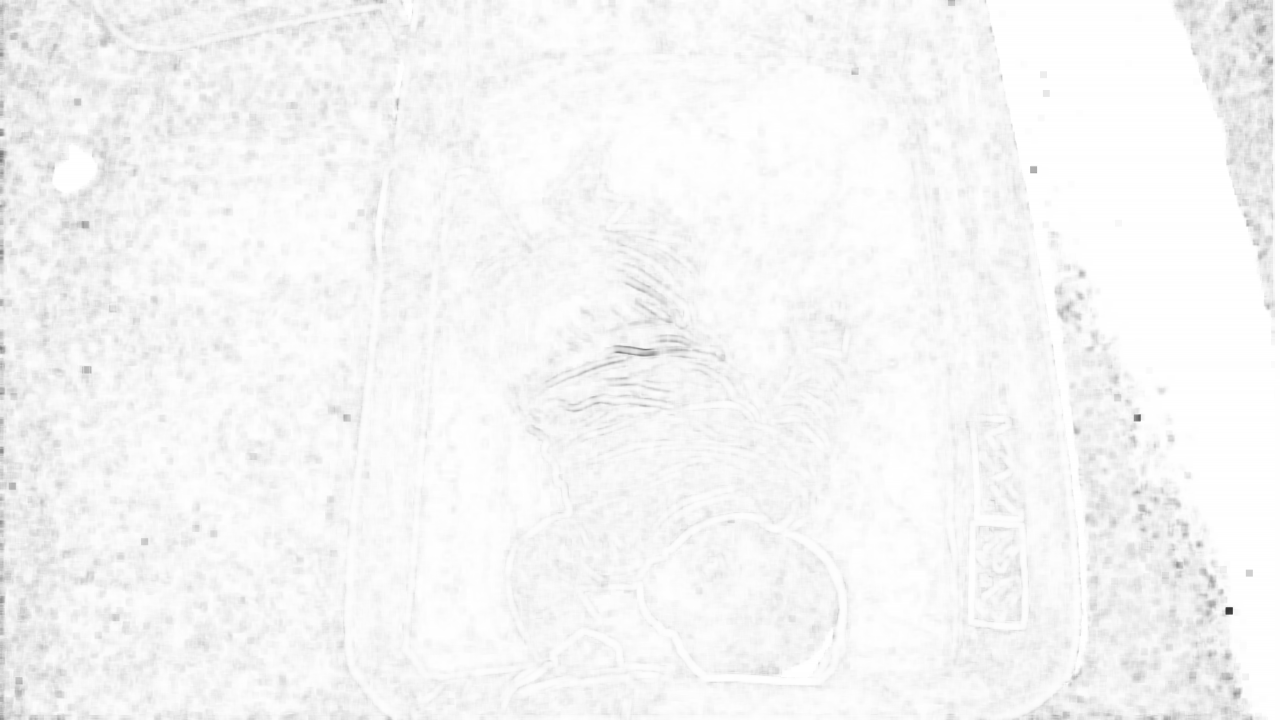

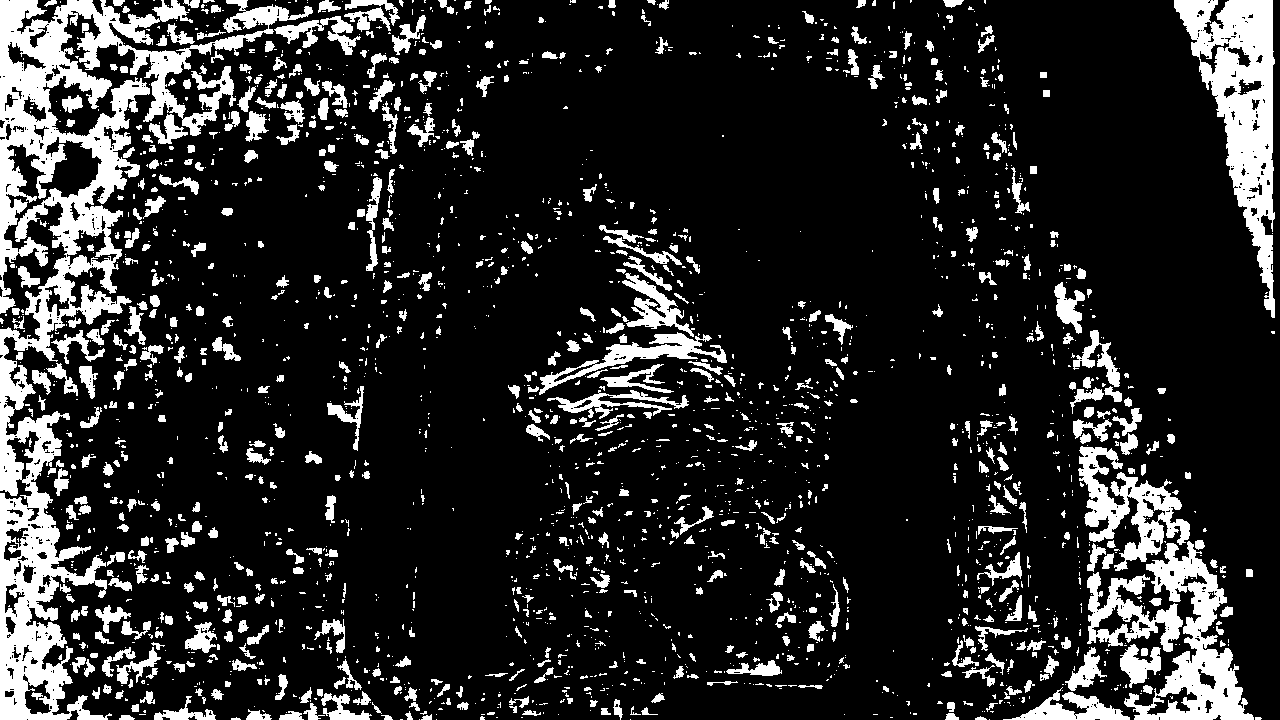

-1

In [109]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


# load the two input images
imageA = cv2.imread('01.png')
imageB = cv2.imread('02.png')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)

SSIM: 0.9879773355466691


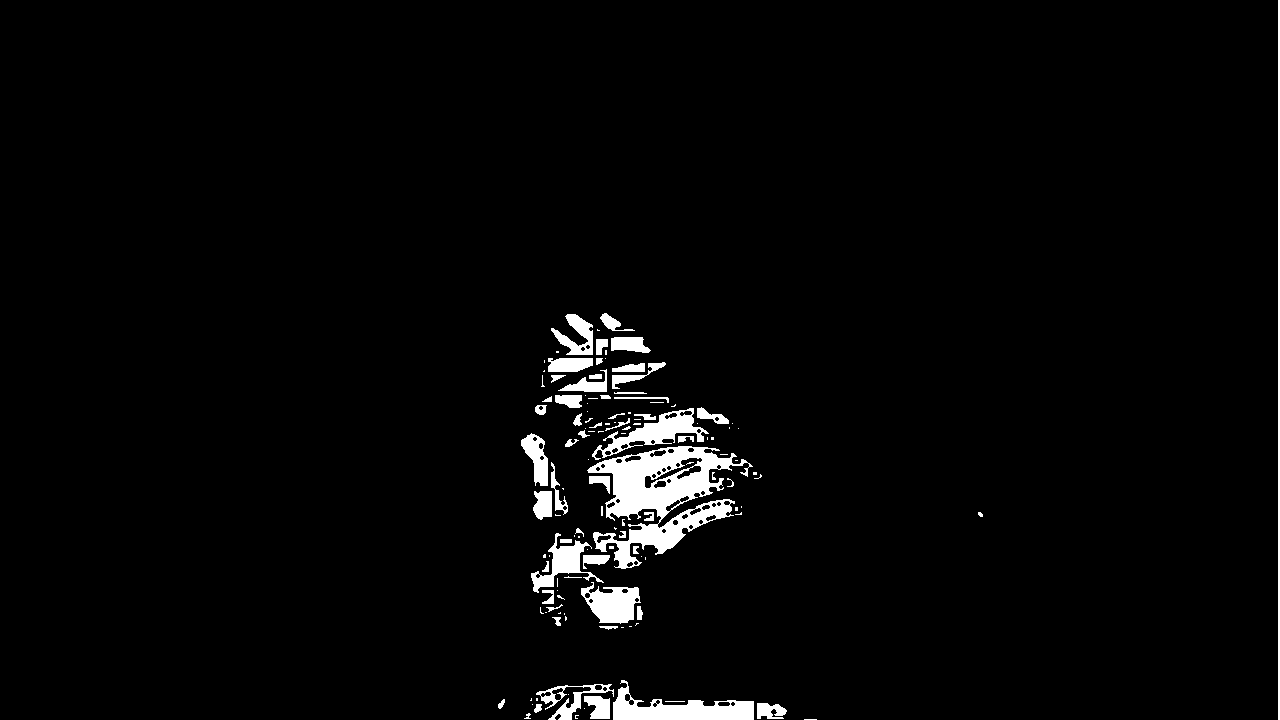

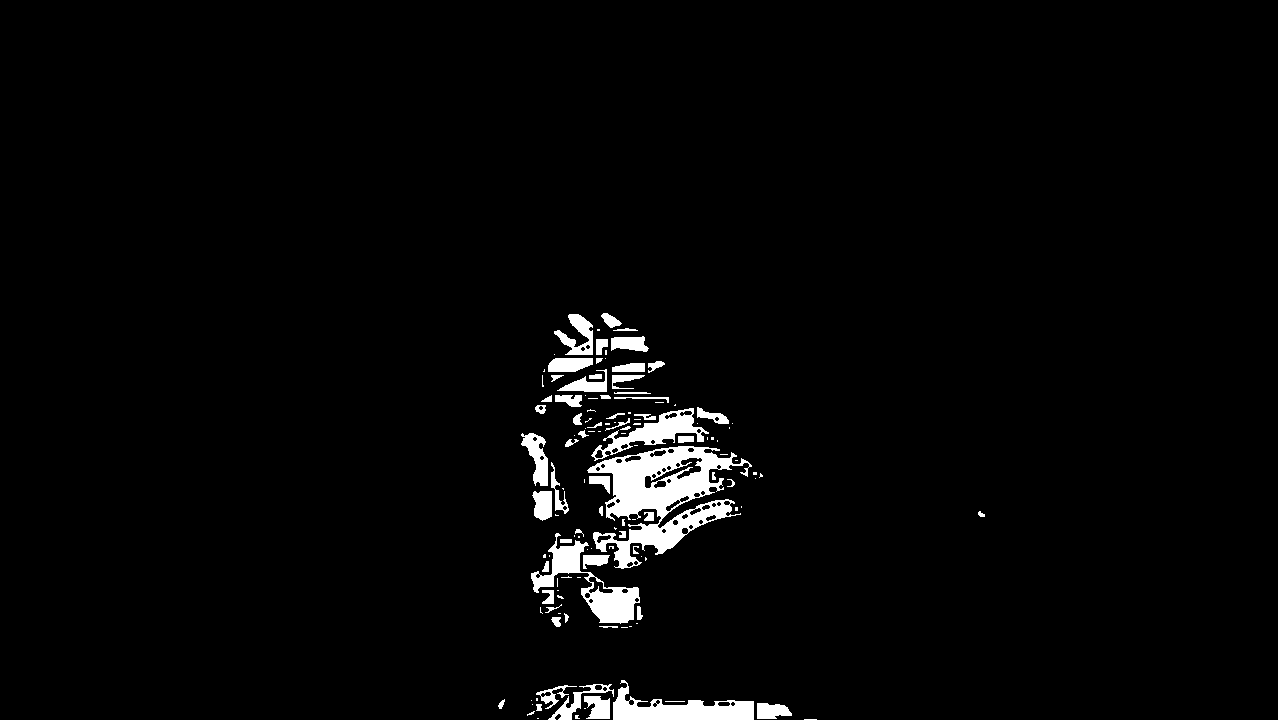

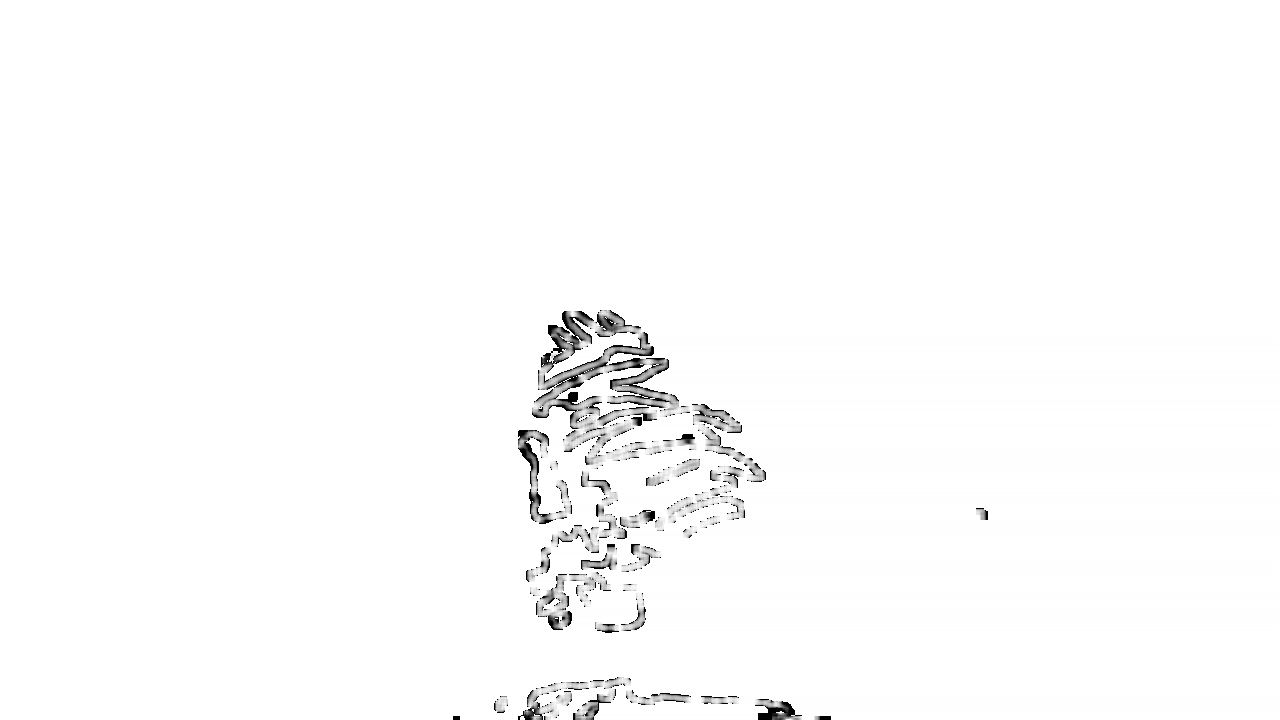

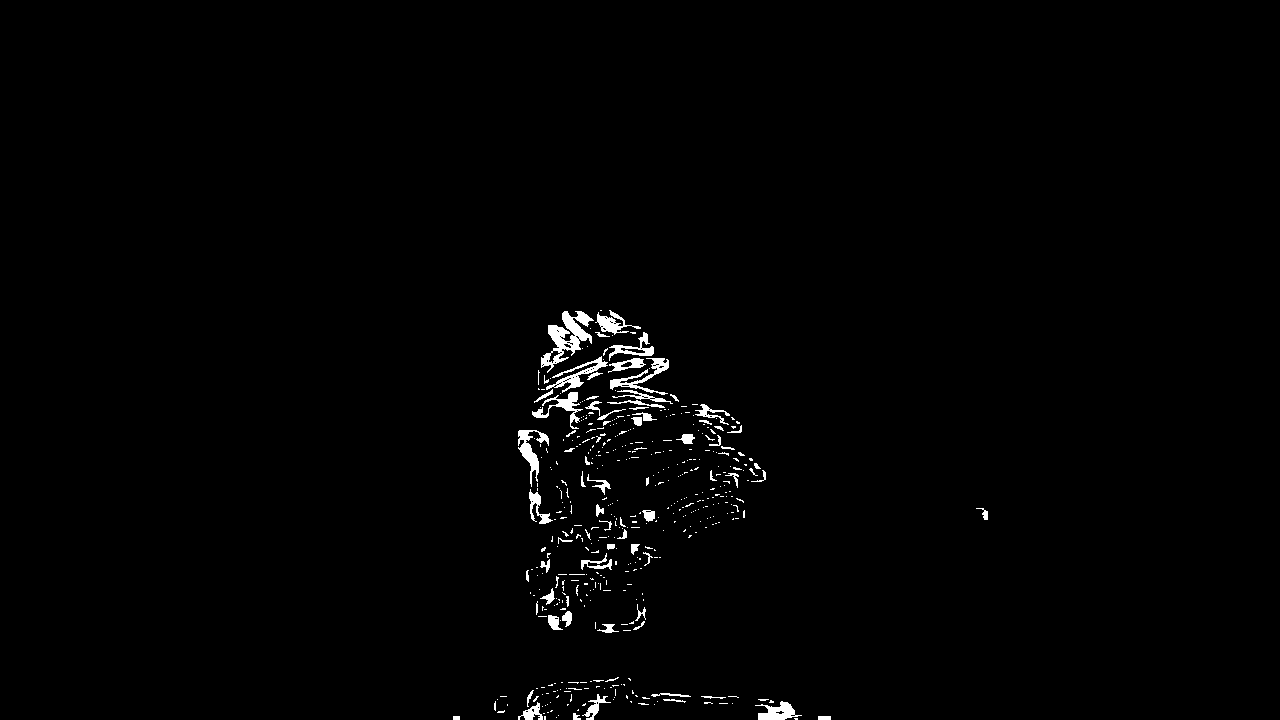

-1

In [110]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


# load the two input images
imageA = cv2.imread('01.png')
imageB = cv2.imread('02.png')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(th1, th2_1, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(th1, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(th2_1, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
cv2_imshow(th1)
cv2_imshow(th2_1)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)